In [1]:
#Bibliotecas para manipulação dos dados e de tempo
import pandas as pd
import numpy as np
import datetime as dt

import numpy as np
from pandas import read_excel
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import re

import time
from dateutil import relativedelta as r

#from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import matplotlib.dates as mdates
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [12]:
seriesunirent = pd.read_excel('C:/Users/edens/Downloads/seriesUnirent.xlsx', sep=';')

In [13]:
seriesunirent.tail()

,Data_Retirada,CFA_SITE,NSH_SITE,CAN_SITE,CFA_APP,NSH_APP,CAN_APP,CFA_TOTAL,NSH_TOTAL,CAN_TOTAL
141,2020-03-21,23.977165,33.016175,43.006660,28.158845,20.577617,51.263538,25.054753,32.763907,42.181340
142,2020-03-22,31.355932,31.355932,37.288136,40.157480,18.110236,41.732283,31.584062,32.458698,35.957240
143,2020-03-23,31.161781,35.504886,33.333333,40.758294,20.379147,38.862559,35.005225,33.803553,31.191223
144,2020-03-24,31.552588,35.392321,33.055092,44.047619,22.023810,33.928571,36.111111,32.330247,31.558642
145,2020-03-25,30.132450,35.927152,33.940397,39.072848,21.854305,39.072848,34.387047,32.690825,32.922128


In [14]:
seriesunirent.shape

(146, 10)

In [15]:
#Convertendo para o formato de datetime do pandas
seriesunirent['Data_Retirada']=pd.to_datetime(seriesunirent['Data_Retirada'], format = "%d/%m/%Y")
seriesunirent.head()

,Data_Retirada,CFA_SITE,NSH_SITE,CAN_SITE,CFA_APP,NSH_APP,CAN_APP,CFA_TOTAL,NSH_TOTAL,CAN_TOTAL
0,2019-11-01,43.740280,33.748056,22.511664,53.293413,16.467066,30.239521,48.664292,30.097952,21.237756
1,2019-11-02,47.121346,34.278122,18.600531,50.264550,19.047619,30.687831,51.630941,31.081081,17.287978
2,2019-11-03,55.229358,26.972477,17.798165,57.281553,19.417476,23.300971,52.957234,30.573248,16.469518
3,2019-11-04,51.174168,30.626223,18.199609,51.677852,19.463087,28.859060,54.383358,28.528975,17.087667
4,2019-11-05,50.737798,29.284904,19.977299,52.229299,21.019108,26.751592,53.869048,28.452381,17.678571


In [16]:
seriesunirent.dtypes

Data_Retirada    datetime64[ns]
CFA_SITE                float64
NSH_SITE                float64
CAN_SITE                float64
CFA_APP                 float64
NSH_APP                 float64
CAN_APP                 float64
CFA_TOTAL               float64
NSH_TOTAL               float64
CAN_TOTAL               float64
dtype: object

In [19]:
#Seperando os datasets para as previsões

#Grupo dataset site
CFA_SITE = seriesunirent[['Data_Retirada', 'CFA_SITE']]
NSH_SITE = seriesunirent[['Data_Retirada','NSH_SITE']]
CAN_SITE = seriesunirent[['Data_Retirada','CAN_SITE']]

#Grupo dataset app
CFA_APP = seriesunirent[['Data_Retirada','CFA_APP']]
NSH_APP = seriesunirent[['Data_Retirada','NSH_APP']]
CAN_APP = seriesunirent[['Data_Retirada','CAN_APP']]

#Grupo dataset total
CFA_TOTAL = seriesunirent[['Data_Retirada','CFA_TOTAL']]
NSH_TOTAL = seriesunirent[['Data_Retirada','NSH_TOTAL']]
CAN_TOTAL = seriesunirent[['Data_Retirada','CAN_TOTAL']]

In [23]:
NSH_SITE.head()

,Data_Retirada,NSH_SITE
0,2019-11-01,33.748056
1,2019-11-02,34.278122
2,2019-11-03,26.972477
3,2019-11-04,30.626223
4,2019-11-05,29.284904


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

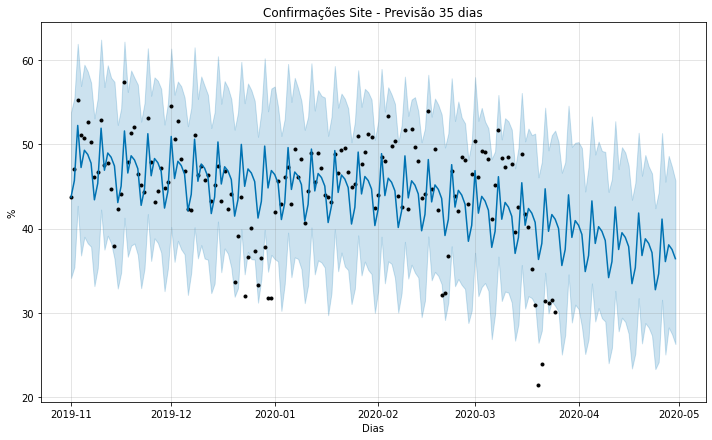

In [46]:
#Previsão Confirmados plataforma do site

CFA_SITE_series = CFA_SITE[(CFA_SITE['Data_Retirada'] >= '2019-11-01') & (CFA_SITE['Data_Retirada'] <= '2020-03-25')] 


CFA_SITE2 = CFA_SITE_series.rename(columns={'Data_Retirada': 'ds', 'CFA_SITE': 'y'})
CFA_SITE2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CFA_SITE2_model.fit(CFA_SITE2)

CFA_SITE2_forecast = CFA_SITE2_model.make_future_dataframe(periods=36, freq='d')
CFA_SITE2_forecast = CFA_SITE2_model.predict(CFA_SITE2_forecast)

plt.figure(figsize=(25, 10))
CFA_SITE2_model.plot(CFA_SITE2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Confirmações Site - Previsão 35 dias');

In [43]:
CFA_SITE2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,44.550883,34.341130,53.759295,44.550883,44.550883,-0.799088,-0.799088,-0.799088,3.426916,3.426916,3.426916,-4.226004,-4.226004,-4.226004,0.0,0.0,0.0,43.751796
1,2019-11-02,44.504162,35.280358,55.553644,44.504162,44.504162,1.206056,1.206056,1.206056,3.426916,3.426916,3.426916,-2.220860,-2.220860,-2.220860,0.0,0.0,0.0,45.710218
2,2019-11-03,44.457441,41.797740,61.533884,44.457441,44.457441,7.794522,7.794522,7.794522,3.426916,3.426916,3.426916,4.367606,4.367606,4.367606,0.0,0.0,0.0,52.251963
3,2019-11-04,44.410719,37.413598,56.889916,44.410719,44.410719,2.849379,2.849379,2.849379,3.426916,3.426916,3.426916,-0.577537,-0.577537,-0.577537,0.0,0.0,0.0,47.260098
4,2019-11-05,44.363998,39.142034,59.596702,44.363998,44.363998,4.942572,4.942572,4.942572,3.426916,3.426916,3.426916,1.515655,1.515655,1.515655,0.0,0.0,0.0,49.306570


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

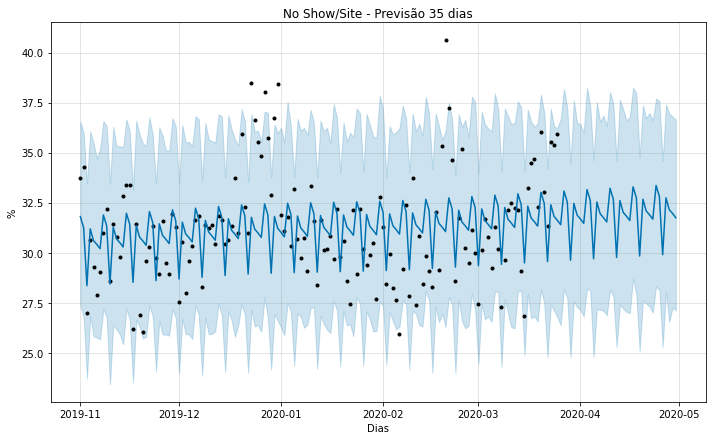

In [41]:
#Previsão No show plataforma do site

NSH_SITE_series = NSH_SITE[(NSH_SITE['Data_Retirada'] >= '2019-11-01') & (NSH_SITE['Data_Retirada'] <= '2020-03-25')] 


NSH_SITE2 = NSH_SITE_series.rename(columns={'Data_Retirada': 'ds', 'NSH_SITE': 'y'})
NSH_SITE2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
NSH_SITE2_model.fit(NSH_SITE2)

NSH_SITE2_forecast = NSH_SITE2_model.make_future_dataframe(periods=36, freq='d')
NSH_SITE2_forecast = NSH_SITE2_model.predict(NSH_SITE2_forecast)

plt.figure(figsize=(25, 10))
NSH_SITE2_model.plot(NSH_SITE2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('No Show/Site - Previsão 35 dias');

In [40]:
NSH_SITE2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,33.077790,26.769766,36.986782,33.077790,33.077790,-1.275482,-1.275482,-1.275482,-2.56764,-2.56764,-2.56764,1.292158,1.292158,1.292158,0.0,0.0,0.0,31.802308
1,2019-11-02,33.089852,26.274977,36.148542,33.089852,33.089852,-1.832950,-1.832950,-1.832950,-2.56764,-2.56764,-2.56764,0.734690,0.734690,0.734690,0.0,0.0,0.0,31.256902
2,2019-11-03,33.101913,23.777390,33.411876,33.101913,33.101913,-4.751751,-4.751751,-4.751751,-2.56764,-2.56764,-2.56764,-2.184112,-2.184112,-2.184112,0.0,0.0,0.0,28.350162
3,2019-11-04,33.113975,26.559547,36.169304,33.113975,33.113975,-1.922546,-1.922546,-1.922546,-2.56764,-2.56764,-2.56764,0.645094,0.645094,0.645094,0.0,0.0,0.0,31.191429
4,2019-11-05,33.126036,25.867245,35.512723,33.126036,33.126036,-2.520185,-2.520185,-2.520185,-2.56764,-2.56764,-2.56764,0.047455,0.047455,0.047455,0.0,0.0,0.0,30.605852


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

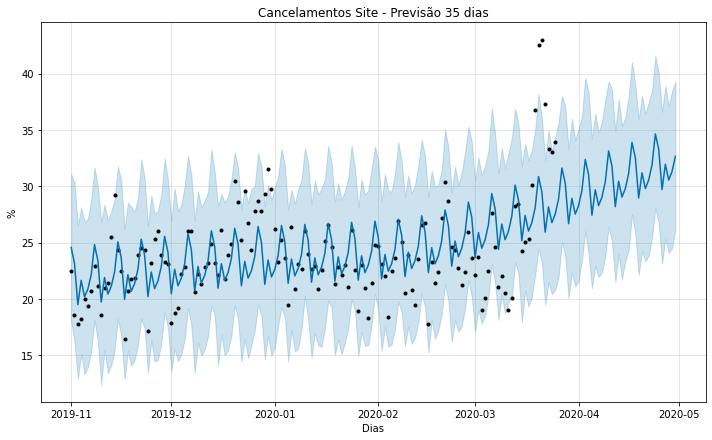

In [47]:
#Previsão Cancelamentos plataforma do site

CAN_SITE_series = CAN_SITE[(CAN_SITE['Data_Retirada'] >= '2019-11-01') & (CAN_SITE['Data_Retirada'] <= '2020-03-25')] 


CAN_SITE2 = CAN_SITE_series.rename(columns={'Data_Retirada': 'ds', 'CAN_SITE': 'y'})
CAN_SITE2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CAN_SITE2_model.fit(CAN_SITE2)

CAN_SITE2_forecast = CAN_SITE2_model.make_future_dataframe(periods=36, freq='d')
CAN_SITE2_forecast = CAN_SITE2_model.predict(CAN_SITE2_forecast)

plt.figure(figsize=(25, 10))
CAN_SITE2_model.plot(CAN_SITE2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Cancelamentos Site - Previsão 35 dias');

In [49]:
CAN_SITE2_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
177,2020-04-26,32.604380,23.132029,36.610047,31.978196,33.211823,-2.902959,-2.902959,-2.902959,-0.698975,-0.698975,-0.698975,-2.203983,-2.203983,-2.203983,0.0,0.0,0.0,29.701422
178,2020-04-27,32.712553,25.329033,38.894349,32.059916,33.341534,-0.764076,-0.764076,-0.764076,-0.698975,-0.698975,-0.698975,-0.065101,-0.065101,-0.065101,0.0,0.0,0.0,31.948477
179,2020-04-28,32.820725,24.079659,37.107231,32.141948,33.475851,-2.270132,-2.270132,-2.270132,-0.698975,-0.698975,-0.698975,-1.571157,-1.571157,-1.571157,0.0,0.0,0.0,30.550593
180,2020-04-29,32.928898,24.499221,38.450530,32.227928,33.615816,-1.622018,-1.622018,-1.622018,-0.698975,-0.698975,-0.698975,-0.923043,-0.923043,-0.923043,0.0,0.0,0.0,31.306880
181,2020-04-30,33.037071,26.133009,39.256438,32.315749,33.753173,-0.388590,-0.388590,-0.388590,-0.698975,-0.698975,-0.698975,0.310385,0.310385,0.310385,0.0,0.0,0.0,32.648481


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

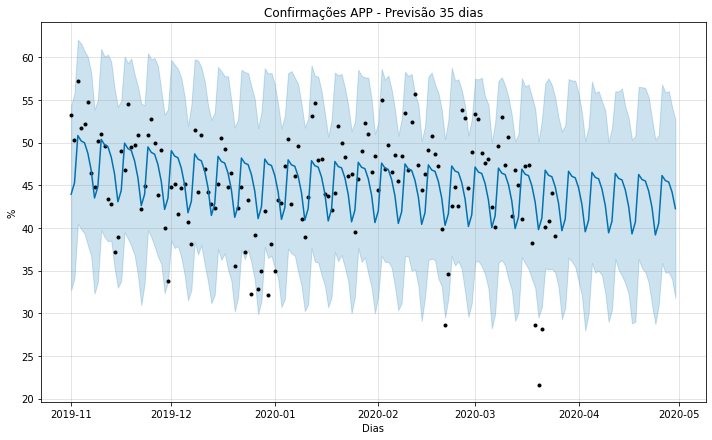

In [51]:
#Previsões aplicadas as serviços do App

#CFA_APP
#NSH_APP
#CAN_APP

#Confirmações via app
CFA_APP_series = CFA_APP[(CFA_APP['Data_Retirada'] >= '2019-11-01') & (CFA_APP['Data_Retirada'] <= '2020-03-25')] 


CFA_APP2 = CFA_APP_series.rename(columns={'Data_Retirada': 'ds', 'CFA_APP': 'y'})
CFA_APP2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CFA_APP2_model.fit(CFA_APP2)

CFA_APP2_forecast = CFA_APP2_model.make_future_dataframe(periods=36, freq='d')
CFA_APP2_forecast = CFA_APP2_model.predict(CFA_APP2_forecast)

plt.figure(figsize=(25, 10))
CFA_APP2_model.plot(CFA_APP2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Confirmações APP - Previsão 35 dias');


In [52]:
CFA_APP2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,52.229185,32.720894,54.371082,52.229185,52.229185,-8.267962,-8.267962,-8.267962,-4.067617,-4.067617,-4.067617,-4.200345,-4.200345,-4.200345,0.0,0.0,0.0,43.961224
1,2019-11-02,52.165471,34.142347,55.790048,52.165471,52.165471,-6.882903,-6.882903,-6.882903,-4.067617,-4.067617,-4.067617,-2.815286,-2.815286,-2.815286,0.0,0.0,0.0,45.282569
2,2019-11-03,52.101758,40.482261,62.074379,52.101758,52.101758,-1.267095,-1.267095,-1.267095,-4.067617,-4.067617,-4.067617,2.800522,2.800522,2.800522,0.0,0.0,0.0,50.834663
3,2019-11-04,52.038044,39.870906,61.608536,52.038044,52.038044,-1.840448,-1.840448,-1.840448,-4.067617,-4.067617,-4.067617,2.227169,2.227169,2.227169,0.0,0.0,0.0,50.197596
4,2019-11-05,51.974330,39.357825,60.745569,51.974330,51.974330,-1.990860,-1.990860,-1.990860,-4.067617,-4.067617,-4.067617,2.076757,2.076757,2.076757,0.0,0.0,0.0,49.983470


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

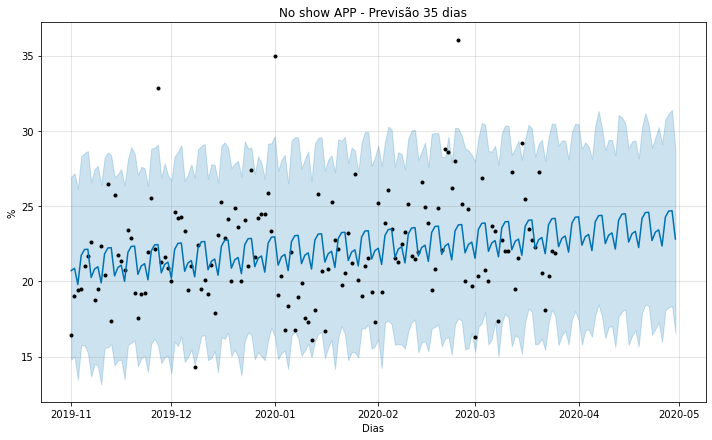

In [55]:
#No show  via app
NSH_APP_series = NSH_APP[(NSH_APP['Data_Retirada'] >= '2019-11-01') & (NSH_APP['Data_Retirada'] <= '2020-03-25')] 


NSH_APP2 = NSH_APP_series.rename(columns={'Data_Retirada': 'ds', 'NSH_APP': 'y'})
NSH_APP2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
NSH_APP2_model.fit(NSH_APP2)

NSH_APP2_forecast = NSH_APP2_model.make_future_dataframe(periods=36, freq='d')
NSH_APP2_forecast = NSH_APP2_model.predict(NSH_APP2_forecast)

plt.figure(figsize=(25, 10))
NSH_APP2_model.plot(NSH_APP2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('No show APP - Previsão 35 dias');


In [56]:
NSH_APP2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,17.370389,14.797186,26.935334,17.370389,17.370389,3.345481,3.345481,3.345481,3.674479,3.674479,3.674479,-0.328998,-0.328998,-0.328998,0.0,0.0,0.0,20.715871
1,2019-11-02,17.385112,15.032111,27.189597,17.385112,17.385112,3.486437,3.486437,3.486437,3.674479,3.674479,3.674479,-0.188042,-0.188042,-0.188042,0.0,0.0,0.0,20.871550
2,2019-11-03,17.399835,13.468494,26.137750,17.399835,17.399835,2.394888,2.394888,2.394888,3.674479,3.674479,3.674479,-1.279591,-1.279591,-1.279591,0.0,0.0,0.0,19.794724
3,2019-11-04,17.414558,15.757571,28.315048,17.414558,17.414558,4.307573,4.307573,4.307573,3.674479,3.674479,3.674479,0.633093,0.633093,0.633093,0.0,0.0,0.0,21.722131
4,2019-11-05,17.429281,15.747409,28.514976,17.429281,17.429281,4.689588,4.689588,4.689588,3.674479,3.674479,3.674479,1.015109,1.015109,1.015109,0.0,0.0,0.0,22.118869


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

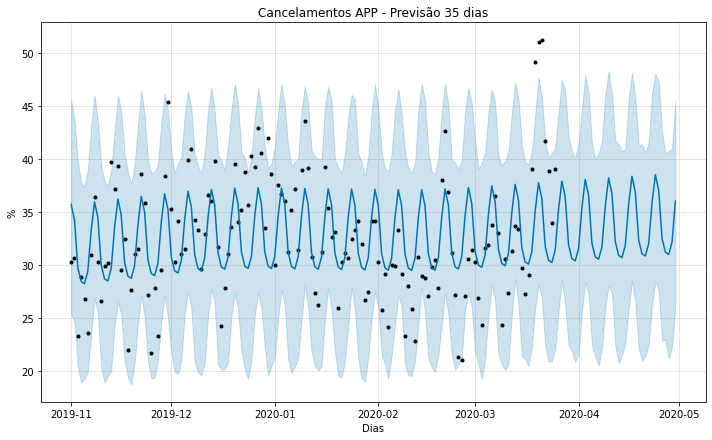

In [57]:
#Cancelamentos via app
CAN_APP_series = CAN_APP[(CAN_APP['Data_Retirada'] >= '2019-11-01') & (CAN_APP['Data_Retirada'] <= '2020-03-25')] 


CAN_APP2 = CAN_APP_series.rename(columns={'Data_Retirada': 'ds', 'CAN_APP': 'y'})
CAN_APP2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CAN_APP2_model.fit(CAN_APP2)

CAN_APP2_forecast = CAN_APP2_model.make_future_dataframe(periods=36, freq='d')
CAN_APP2_forecast = CAN_APP2_model.predict(CAN_APP2_forecast)

plt.figure(figsize=(25, 10))
CAN_APP2_model.plot(CAN_APP2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Cancelamentos APP - Previsão 35 dias');


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

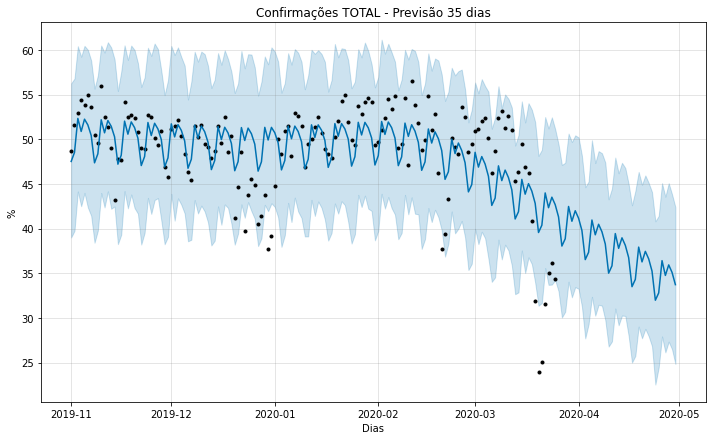

In [58]:
#Previsões aplicadas aos valores totais

#CFA_TOTAL
#NSH_TOTAL
#CAN_TOTAL

CFA_TOTAL_series = CFA_TOTAL[(CFA_TOTAL['Data_Retirada'] >= '2019-11-01') & (CFA_TOTAL['Data_Retirada'] <= '2020-03-25')] 


CFA_TOTAL2 = CFA_TOTAL_series.rename(columns={'Data_Retirada': 'ds', 'CFA_TOTAL': 'y'})
CFA_TOTAL2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CFA_TOTAL2_model.fit(CFA_TOTAL2)

CFA_TOTAL2_forecast = CFA_TOTAL2_model.make_future_dataframe(periods=36, freq='d')
CFA_TOTAL2_forecast = CFA_TOTAL2_model.predict(CFA_TOTAL2_forecast)

plt.figure(figsize=(25, 10))
CFA_TOTAL2_model.plot(CFA_TOTAL2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Confirmações TOTAL - Previsão 35 dias');

In [59]:
CFA_TOTAL2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,48.994667,39.012016,56.264622,48.994667,48.994667,-1.470388,-1.470388,-1.470388,1.583872,1.583872,1.583872,-3.054260,-3.054260,-3.054260,0.0,0.0,0.0,47.524279
1,2019-11-02,48.972891,39.764424,56.801363,48.972891,48.972891,-0.437498,-0.437498,-0.437498,1.583872,1.583872,1.583872,-2.021370,-2.021370,-2.021370,0.0,0.0,0.0,48.535393
2,2019-11-03,48.951114,44.162754,60.424602,48.951114,48.951114,3.392032,3.392032,3.392032,1.583872,1.583872,1.583872,1.808161,1.808161,1.808161,0.0,0.0,0.0,52.343147
3,2019-11-04,48.929338,42.515769,59.241709,48.929338,48.929338,1.954307,1.954307,1.954307,1.583872,1.583872,1.583872,0.370435,0.370435,0.370435,0.0,0.0,0.0,50.883645
4,2019-11-05,48.907562,44.003555,60.461591,48.907562,48.907562,3.349313,3.349313,3.349313,1.583872,1.583872,1.583872,1.765441,1.765441,1.765441,0.0,0.0,0.0,52.256875


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

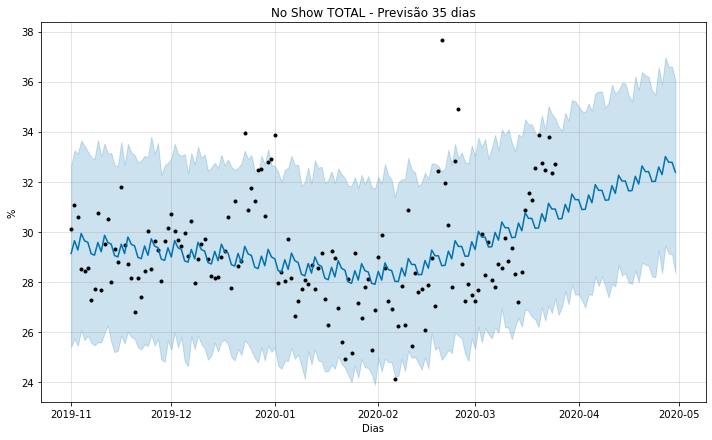

In [60]:
NSH_TOTAL_series = NSH_TOTAL[(NSH_TOTAL['Data_Retirada'] >= '2019-11-01') & (NSH_TOTAL['Data_Retirada'] <= '2020-03-25')] 


NSH_TOTAL2 = NSH_TOTAL_series.rename(columns={'Data_Retirada': 'ds', 'NSH_TOTAL': 'y'})
NSH_TOTAL2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
NSH_TOTAL2_model.fit(NSH_TOTAL2)

NSH_TOTAL2_forecast = NSH_TOTAL2_model.make_future_dataframe(periods=36, freq='d')
NSH_TOTAL2_forecast = NSH_TOTAL2_model.predict(NSH_TOTAL2_forecast)

plt.figure(figsize=(25, 10))
NSH_TOTAL2_model.plot(NSH_TOTAL2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('No Show TOTAL - Previsão 35 dias');

In [61]:
NSH_TOTAL2_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,29.953945,25.398268,32.650271,29.953945,29.953945,-0.814963,-0.814963,-0.814963,-0.44766,-0.44766,-0.44766,-0.367303,-0.367303,-0.367303,0.0,0.0,0.0,29.138982
1,2019-11-02,29.943906,25.733905,33.252791,29.943906,29.943906,-0.298344,-0.298344,-0.298344,-0.44766,-0.44766,-0.44766,0.149316,0.149316,0.149316,0.0,0.0,0.0,29.645562
2,2019-11-03,29.933867,25.453347,33.118988,29.933867,29.933867,-0.660618,-0.660618,-0.660618,-0.44766,-0.44766,-0.44766,-0.212958,-0.212958,-0.212958,0.0,0.0,0.0,29.273250
3,2019-11-04,29.923828,26.077219,33.642823,29.923828,29.923828,0.010070,0.010070,0.010070,-0.44766,-0.44766,-0.44766,0.457730,0.457730,0.457730,0.0,0.0,0.0,29.933898
4,2019-11-05,29.913789,25.669192,33.445345,29.913789,29.913789,-0.271413,-0.271413,-0.271413,-0.44766,-0.44766,-0.44766,0.176247,0.176247,0.176247,0.0,0.0,0.0,29.642376


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1800x720 with 0 Axes>

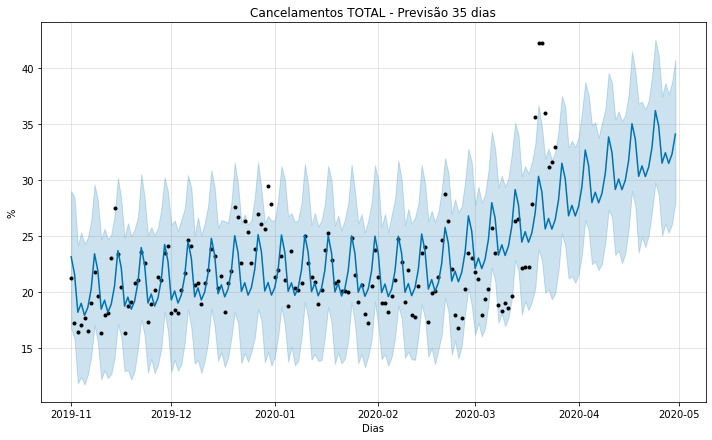

In [62]:
CAN_TOTAL_series = CAN_TOTAL[(CAN_TOTAL['Data_Retirada'] >= '2019-11-01') & (CAN_TOTAL['Data_Retirada'] <= '2020-03-25')] 


CAN_TOTAL2 = CAN_TOTAL_series.rename(columns={'Data_Retirada': 'ds', 'CAN_TOTAL': 'y'})
CAN_TOTAL2_model = Prophet(interval_width=0.95, daily_seasonality = True) #daily_seasonality = True
CAN_TOTAL2_model.fit(CAN_TOTAL2)

CAN_TOTAL2_forecast = CAN_TOTAL2_model.make_future_dataframe(periods=36, freq='d')
CAN_TOTAL2_forecast = CAN_TOTAL2_model.predict(CAN_TOTAL2_forecast)

plt.figure(figsize=(25, 10))
CAN_TOTAL2_model.plot(CAN_TOTAL2_forecast, xlabel = 'Dias', ylabel = '%')
plt.title('Cancelamentos TOTAL - Previsão 35 dias');

In [64]:
CAN_TOTAL2_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
177,2020-04-26,34.278829,25.026636,37.444520,33.184714,35.389239,-2.785927,-2.785927,-2.785927,-1.192741,-1.192741,-1.192741,-1.593186,-1.593186,-1.593186,0.0,0.0,0.0,31.492902
178,2020-04-27,34.446370,26.091230,38.631255,33.299312,35.601396,-2.021366,-2.021366,-2.021366,-1.192741,-1.192741,-1.192741,-0.828625,-0.828625,-0.828625,0.0,0.0,0.0,32.425004
179,2020-04-28,34.613910,25.283165,37.632209,33.419814,35.842491,-3.138317,-3.138317,-3.138317,-1.192741,-1.192741,-1.192741,-1.945575,-1.945575,-1.945575,0.0,0.0,0.0,31.475594
180,2020-04-29,34.781451,26.081388,38.709778,33.516272,36.076568,-2.465191,-2.465191,-2.465191,-1.192741,-1.192741,-1.192741,-1.272449,-1.272449,-1.272449,0.0,0.0,0.0,32.316260
181,2020-04-30,34.948991,28.049288,40.749438,33.644830,36.295276,-0.858560,-0.858560,-0.858560,-1.192741,-1.192741,-1.192741,0.334182,0.334182,0.334182,0.0,0.0,0.0,34.090432


In [72]:
#Criando novos datasets apenas com  as previsões

''''
CFA_SITE2_forecast
NSH_SITE2_forecast
CAN_SITE2_forecast

CFA_APP2_forecast
NSH_APP2_forecast
CAN_APP2_forecast

CFA_TOTAL2_forecast
NSH_TOTAL2_forecast
CAN_TOTAL2_forecast

Data_Retirada
CFA_SITE
NSH_SITE
CAN_SITE
CFA_APP
NSH_APP
CAN_APP
CFA_TOTAL
NSH_TOTAL
CAN_TOTAL

'''
#Previsões site renomeando as colunas e criando os novos datasets
CFA_SITE_previsao = CFA_SITE2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CFA_SITE_tendência',
                                                      'yhat': 'CFA_SITE_previsto'})

NSH_SITE_previsao = NSH_SITE2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'NSH_SITE_tendência',
                                                      'yhat': 'NSH_SITE_previsto'})

CAN_SITE_previsao = CAN_SITE2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CAN_SITE_tendência',
                                                      'yhat': 'CAN_SITE_previsto'})



CFA_APP_previsao = CFA_APP2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CFA_APP_tendência',
                                                      'yhat': 'CFA_APP_previsto'})

NSH_APP_previsao = NSH_APP2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'NSH_APP_tendência',
                                                      'yhat': 'NSH_APP_previsto'})

CAN_APP_previsao = CAN_APP2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CAN_APP_tendência',
                                                      'yhat': 'CAN_APP_previsto'})


CFA_TOTAL_previsao = CFA_TOTAL2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CFA_TOTAL_tendência',
                                                      'yhat': 'CFA_TOTAL_previsto'})

NSH_TOTAL_previsao = NSH_TOTAL2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'NSH_TOTAL_tendência',
                                                      'yhat': 'NSH_TOTAL_previsto'})

CAN_TOTAL_previsao = CAN_TOTAL2_forecast.rename(columns={'ds': 'Data_Retirada', 
                                                      'trend': 'CAN_TOTAL_tendência',
                                                      'yhat': 'CAN_TOTAL_previsto'})


#Dataset site
CFA_SITE_previsao2 = CFA_SITE_previsao[['Data_Retirada','CFA_SITE_tendência','CFA_SITE_previsto']]
NSH_SITE_previsao2 = NSH_SITE_previsao[['Data_Retirada','NSH_SITE_tendência','NSH_SITE_previsto']]
CAN_SITE_previsao2 = CAN_SITE_previsao[['Data_Retirada','CAN_SITE_tendência','CAN_SITE_previsto']]

#Dataset app
CFA_APP_previsao2 = CFA_APP_previsao[['Data_Retirada','CFA_APP_tendência','CFA_APP_previsto']]
NSH_APP_previsao2 = NSH_APP_previsao[['Data_Retirada','NSH_APP_tendência','NSH_APP_previsto']]
CAN_APP_previsao2 = CAN_APP_previsao[['Data_Retirada','CAN_APP_tendência','CAN_APP_previsto']]

#Dataset total
CFA_TOTAL_previsao2 = CFA_TOTAL_previsao[['Data_Retirada','CFA_TOTAL_tendência','CFA_TOTAL_previsto']]
NSH_TOTAL_previsao2 = NSH_TOTAL_previsao[['Data_Retirada','NSH_TOTAL_tendência','NSH_TOTAL_previsto']]
CAN_TOTAL_previsao2 = CAN_TOTAL_previsao[['Data_Retirada','CAN_TOTAL_tendência','CAN_TOTAL_previsto']]

NSH_TOTAL_previsao2.tail()

,Data_Retirada,NSH_TOTAL_tendência,NSH_TOTAL_previsto
177,2020-04-26,32.942823,32.282205
178,2020-04-27,32.996199,33.006269
179,2020-04-28,33.049576,32.778162
180,2020-04-29,33.102952,32.777959
181,2020-04-30,33.156328,32.382970


In [80]:
#Realizando as junções dos dados
t1 = pd.merge(CFA_SITE_previsao2, NSH_SITE_previsao2, on='Data_Retirada')
t2 = pd.merge(t1, CAN_SITE_previsao2, on='Data_Retirada')
t3 = pd.merge(t2, CFA_APP_previsao2, on='Data_Retirada')
t4 = pd.merge(t3, NSH_APP_previsao2, on='Data_Retirada')
t5 = pd.merge(t4, CAN_APP_previsao2, on='Data_Retirada')
t6 = pd.merge(t5, CFA_TOTAL_previsao2, on='Data_Retirada')
t7 = pd.merge(t6, NSH_TOTAL_previsao2, on='Data_Retirada')
t8 = pd.merge(t7, CAN_TOTAL_previsao2, on='Data_Retirada')
t8.head()

,Data_Retirada,CFA_SITE_tendência,CFA_SITE_previsto,NSH_SITE_tendência,NSH_SITE_previsto,CAN_SITE_tendência,CAN_SITE_previsto,CFA_APP_tendência,CFA_APP_previsto,NSH_APP_tendência,NSH_APP_previsto,CAN_APP_tendência,CAN_APP_previsto,CFA_TOTAL_tendência,CFA_TOTAL_previsto,NSH_TOTAL_tendência,NSH_TOTAL_previsto,CAN_TOTAL_tendência,CAN_TOTAL_previsto
0,2019-11-01,44.550883,43.751796,33.077790,31.802308,22.313116,24.569064,52.229185,43.961224,17.370389,20.715871,30.407120,35.707474,48.994667,47.524279,29.953945,29.138982,20.909822,23.146107
1,2019-11-02,44.504162,45.710218,33.089852,31.256902,22.348123,23.147124,52.165471,45.282569,17.385112,20.871550,30.443117,34.216986,48.972891,48.535393,29.943906,29.645562,20.949111,21.632997
2,2019-11-03,44.457441,52.251963,33.101913,28.350162,22.383129,19.480171,52.101758,50.834663,17.399835,19.794724,30.479114,29.725566,48.951114,52.343147,29.933867,29.273250,20.988401,18.202473
3,2019-11-04,44.410719,47.260098,33.113975,31.191429,22.418136,21.654060,52.038044,50.197596,17.414558,21.722131,30.515110,28.430575,48.929338,50.883645,29.923828,29.933898,21.027690,19.006324
4,2019-11-05,44.363998,49.306570,33.126036,30.605852,22.453142,20.183010,51.974330,49.983470,17.429281,22.118869,30.551107,28.233202,48.907562,52.256875,29.913789,29.642376,21.066980,17.928663


In [82]:
t8.to_excel('UnirentProjecao.xlsx', index=False)